Parts of code are from https://mdommett.github.io/blog/interpolation-with-gaussian-broadening/

Use: grep "Excited State " gaussian_test.log > spectra.txt 
on terminal to get values for #inputs

scp -r jennadraude@grace.tamu.edu:/scratch/user/jennadraude/ppv_molecules/bu_et/trans_monomer/b3theory/tddft.log desktop/school/chem/research/results_from_remote/PPV_ogeom/trans_monomer

scp -r jennadraude@grace.tamu.edu:/scratch/user/jennadraude/ppv_molecules/bu_et/trans_monomer/b3theory/tenstates/tddft_10states.log desktop/school/chem/research/results_from_remote/lsa

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cclib


#plt.rcParams['figure.dpi'] = 300 # min as 300 // should be the same for all figures


https://colorbrewer2.org/#type=diverging&scheme=RdYlBu&n=7
use this for colors and pick colorblind safe and save as png svg

In [2]:
def extract_tddft_data(directory):
    tddft_data = {}  # Dictionary to store the results
    log_files = [f for f in os.listdir(directory) if f.endswith('.log')]

    # Excited state energies & oscillation strengths
    for log_file in log_files:
        file_path = os.path.join(directory, log_file)
        data = cclib.io.ccread(file_path)
        
        if hasattr(data, 'etenergies') and hasattr(data, 'etoscs'):
            # Convert energies to eV
            converted_energies = [energy * 0.000123984 for energy in data.etenergies]
            oscillation_strengths = data.etoscs

            # Store the data in the dictionary
            tddft_data[log_file] = (converted_energies, oscillation_strengths)
            print(f"Extracted data from {log_file}")
        else:
            print(f"No excited state data found in {log_file}.")

    return tddft_data

#tddft_files = "/Users/jennadraude/desktop/school/chem/research/results_from_remote/PPV_ogeom/trans_monomer"
tddft_files = "/Users/jennadraude/desktop/school/chem/research/"
extracted_data = extract_tddft_data(tddft_files)

# Displaying the dictionary
for file_name, (energies, osc) in extracted_data.items():
    print(f"{file_name}:")
    print(f"  Energies (eV): {energies}")
    print(f"  Oscillation Strengths: {osc}")
    
'''
for log_file in log_files:
    file_path = os.path.join(tddft_files, log_file)
    data = cclib.io.ccread(file_path)
    
    if hasattr(data, 'etenergies') and hasattr(data, 'etoscs'):
        converted_energies = [energy * 0.000123984 for energy in data.etenergies] #convert to eV
        energies.extend(converted_energies)
        osc.extend(data.etoscs)
        print(f"Extracted data from {log_file}")
    else:
        print(f"No excited state data found in {log_file}.")

'''


Extracted data from first_250states.log
first_250states.log:
  Energies (eV): [3.0129953095163478, 3.232494967810021, 3.3102948466949766, 3.43359465474787, 3.632094345733264, 3.7328941888130016, 3.746394167796895, 3.8051940762600753, 3.831794034850561, 3.8485940086971837, 3.8846939524985578, 3.961393833095937, 3.9730938148819783, 3.994893780944858, 4.062293676019999, 4.076493653914169, 4.09169363025159, 4.0967936223121715, 4.112293598182568, 4.126693575765387, 4.135493562065999, 4.163893517854338, 4.169893508513845, 4.187393481270745, 4.191993474109701, 4.207293450291447, 4.212793441729328, 4.219993430520739, 4.227993418066749, 4.237893402654938, 4.252493379926409, 4.264893360622724, 4.275393344276864, 4.290393320925635, 4.311393288233914, 4.362393208839733, 4.391293163849697, 4.431093101891101, 4.4379930911495356, 4.439993088036038, 4.5038929885598, 4.543692926601204, 4.5695928862814155, 4.619592808443983, 4.633292787116526, 4.670392729361151, 4.679792714727715, 4.6920926955797055, 4.

'\nfor log_file in log_files:\n    file_path = os.path.join(tddft_files, log_file)\n    data = cclib.io.ccread(file_path)\n    \n    if hasattr(data, \'etenergies\') and hasattr(data, \'etoscs\'):\n        converted_energies = [energy * 0.000123984 for energy in data.etenergies] #convert to eV\n        energies.extend(converted_energies)\n        osc.extend(data.etoscs)\n        print(f"Extracted data from {log_file}")\n    else:\n        print(f"No excited state data found in {log_file}.")\n\n'

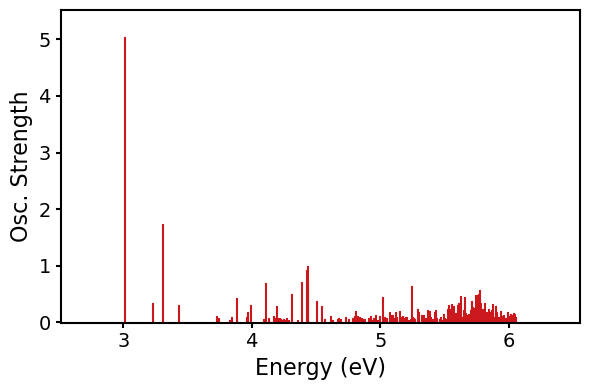

In [3]:
fig, plot1 = plt.subplots(figsize=(6, 4))

# Loop to plot
for file_name, (energies, osc_strengths) in extracted_data.items():
    for energy, osc_strength in zip(energies, osc_strengths):
        plot1.plot([energy, energy], [0, osc_strength], color="#cb181d")

    # Labels and format
plot1.set_xlabel("Energy (eV)", fontsize=16)
plot1.set_ylabel("Osc. Strength", fontsize=16)
plot1.xaxis.set_tick_params(labelsize=14, width=1.5)
plot1.yaxis.set_tick_params(labelsize=14, width=1.5)

    # To make plot look better:
for axis in ['top', 'bottom', 'left', 'right']:
    plot1.spines[axis].set_linewidth(1.5)

    # Limits axes
plot1.set_xlim(min(energies) - 0.5, max(energies) + 0.5)
plot1.set_ylim(-0.01, max(osc)+0.5)


plt.tight_layout()
plt.show()


In [4]:
   # Function spectra as function of oscillator
def spectrum(E,osc,sigma,x):
    gE=[]
    for Ei in x:
        tot=0
        for Ej,os in zip(E,osc):
            tot+=os*np.exp(-((((Ej-Ei)/sigma)**2)))
        gE.append(tot)
    return gE

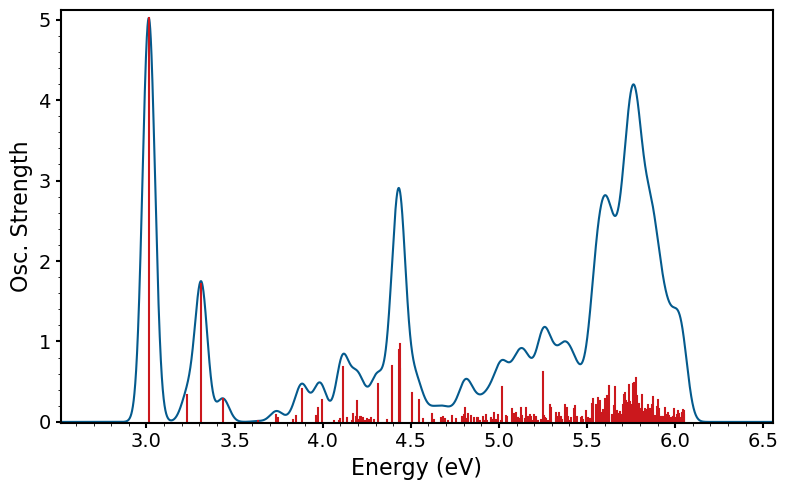

In [6]:
# Create x values // scale
x = np.linspace(min(energies) - 0.5, max(energies) + 0.5, num=10000)

# ADD Sigmas & colors
sigma_values = [0.05]
colors = ['#045a8d'] #'#74a9cf', '#fc9272', '#ef3b2c']

# Plot
fig, plot2 = plt.subplots(figsize=(8, 5))

# Iterate through the dictionary to plot each dataset
for file_name, (energies, osc_strengths) in extracted_data.items():
    # Create x values for plotting the spectrum
    x = np.linspace(min(energies) - 0.5, max(energies) + 0.5, num=10000)

    # Plot Gaussian curves for different sigma values
    for sigma, color in zip(sigma_values, colors):
        gE = spectrum(energies, osc_strengths, sigma, x)
        plot2.plot(x, gE, '-', color=color, label=f'σ={sigma}')

    # Plot vertical lines for original data points
    for energy, osc_strength in zip(energies, osc_strengths):
        plot2.plot([energy, energy], [0, osc_strength], c="#cb181d")


# Setting labels & formatting 
plot2.set_xlabel("Energy (eV)", fontsize=16)
plot2.set_ylabel("Osc. Strength", fontsize=16)
plot2.xaxis.set_tick_params(labelsize=14, width=1.5)
plot2.yaxis.set_tick_params(labelsize=14, width=1.5)
plot2.set_xlim(min(energies) - 0.5, max(energies) + 0.5)
plot2.set_ylim(-0.01, max(osc) + 0.1)
#plot2.set_xlim(3,6)
#plot2.set_ylim(0,2.75)


   #  make plot better to read
for axis in ['top', 'bottom', 'left', 'right']:
    plot2.spines[axis].set_linewidth(1.5)

plt.minorticks_on()
plt.tight_layout()
#plt.legend()
save_path = "/Users/jennadraude/desktop/spectrum_plot.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()



-----------------------------------------------------------------------------------------
To get a more resolute gaussian broadening curve:
   1 - Increased the resolution of x by setting num=<higher number> to make the Gaussian broadening line smoother
   2 - Setting sigma to a lower value
    
    plt.savefig(<name of file>) instead of screenshot and


save_path = "/Users/jennadraude/desktop/spectrum_plot.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
